In [1]:
import matplotlib.pyplot as plt
import torch
from torchvision.utils import make_grid
from torchvision.transforms.functional import to_pil_image
from dataset_builder import BuildingSketchDataset  # Update with your file name
import random
import os

/home/athiwat/.conda/envs/control/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Instantiate dataset with augmentations
dataset = BuildingSketchDataset(
    data_root="/home/athiwat/progressive_img2sketch/resources/LOD_combined_sketches_best_i_think",
    pair_from_to=(3, 1),
    resolution=512,
    augment=True
)

# Check total samples
print("Total samples:", len(dataset))


Processed 46 with 3312 pairs.
Total samples: 3312


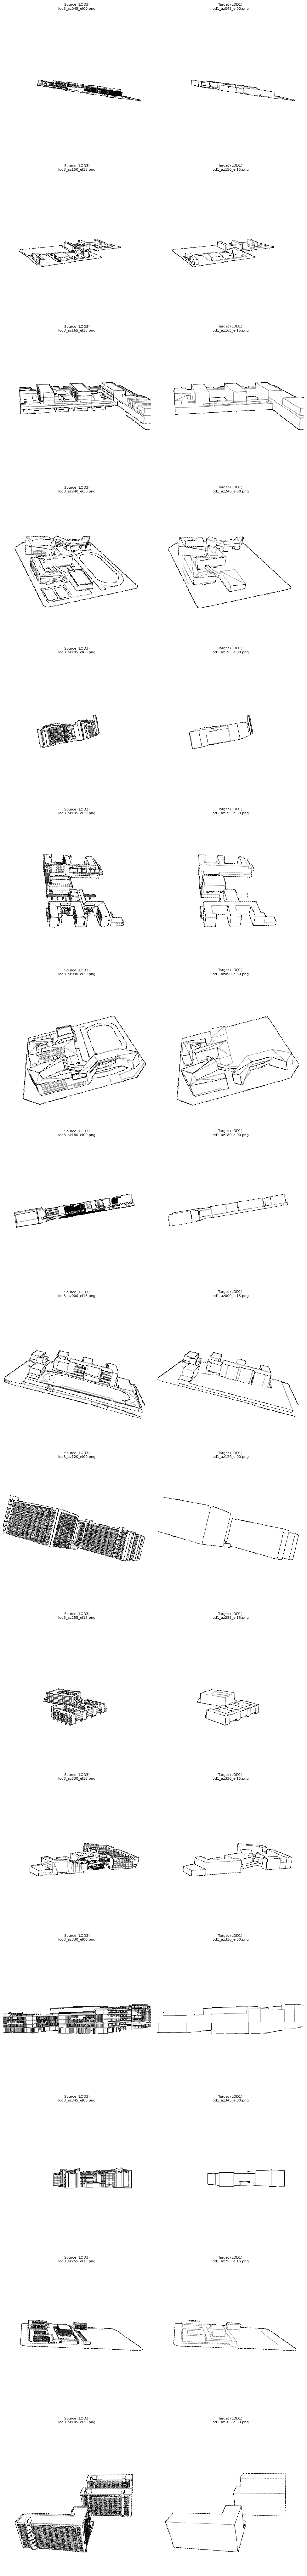

In [3]:
import matplotlib.pyplot as plt

# Desired resolution per subplot
img_size = 512
dpi = 100
figsize = (2 * img_size / dpi, 16 * img_size / dpi)  # (width, height) in inches

# Randomly sample 16 pairs
indices = random.sample(range(len(dataset)), 16)
samples = [dataset[i] for i in indices]
paths = [dataset.image_pairs[i] for i in indices]

# Create figure
fig, axes = plt.subplots(nrows=16, ncols=2, figsize=figsize, dpi=dpi)

for row, (sample, (src_path, tgt_path)) in enumerate(zip(samples, paths)):
    source_img = sample["conditioning_pixel_values"]
    target_img = sample["pixel_values"]

    # Convert to HWC format
    source_np = source_img.permute(1, 2, 0).numpy()
    target_np = target_img.permute(1, 2, 0).numpy()

    # Plot with no interpolation (keeps crisp lines)
    axes[row, 0].imshow(source_np, interpolation='nearest')
    axes[row, 0].set_title(f"Source (LOD{dataset.source_lod})\n{os.path.basename(src_path)}", fontsize=8)
    axes[row, 0].axis("off")

    axes[row, 1].imshow(target_np, interpolation='nearest')
    axes[row, 1].set_title(f"Target (LOD{dataset.target_lod})\n{os.path.basename(tgt_path)}", fontsize=8)
    axes[row, 1].axis("off")

plt.tight_layout()
plt.show()
